# ELE 435/535 Homework 9: Gradient Descent and Neural Networks

### Name: Amir Reza Vazifeh

## Part 1. Neural Networks

In this part, we will use Keras and TensorFlow to train a neural network on MNIST dataset. We will compare the neural network with a multinomial softmax regression. Write the code for training these two models.

There are two options to do this: (1) Install TensorFlow as descibed below,   
OR   
use Google's Colab. Option 2 offers the potential of faster machines and a nice jupyter notebook style API. The code and results you write and run on Colab can be downloaded as a Jupyter notebook. NOTE: the load on Colab varies over time so don't wait to the last day to use Colab.

## 1. TensorFlow Installation

TensorFlow is a free and an open source software library for numerical computation using data flow graphs. It was originally developed by researchers and engineers working on the Google Brain Team within Google's Machine Intelligence research organization for the purposes of conducting machine learning and deep neural networks research. However, it's applicable in a wide variety of other domains as well.

1. Install Anaconda by following the instructions here https://www.anaconda.com/download. This should work for all MAC, Linux and Windows operating systems.
2. Open your Anaconda terminal and create a new environment called tensorflow using the following command: <br> conda create -n tensorflow python=3.6 <br>
3. Now, activate your tensorflow environment by typing <br> source activate tensorflow (MAC and Linux) <br> activate tensorflow (Windows) <br>
4. Once the new envoironment is activated, we are going to install the following packages:<br> conda install ipython <br> conda install jupyter <br> conda install matplotlib <br> conda install -c conda-forge tensorflow

## 2. Import keras from Tensorflow
There are many well-written tutorials on how to use TensorFlow. For example, see:  <br> https://www.datacamp.com/community/tutorials/tensorflow-tutorial <br>
Further, these days high-level APIs such as Keras has made it very easy to train very deep neural networks. For example, simply with 4-5 lines of code with Keras running on top of TensorFlow (https://www.tensorflow.org/tutorials/), you can get more than 95% test accuracy on MNIST.

In [1]:
# This code is provided
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

## 3. Load the MINST dataset from keras

In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical


# This code is provided
# download the data
num_train = 30000
(train_images_2d, train_labels), (test_images_2d, test_labels) = mnist.load_data()
train_images_2d = train_images_2d[0:num_train,:,:]
train_labels = train_labels[0:num_train]
print('Training images shape:',train_images_2d.shape)
print('Training labels shape:',train_labels.shape)
print('Testing images shape:',test_images_2d.shape)
print('Training labels shape:',test_labels.shape)
print('------------------------------------------------------')

# reshape and scale the images
train_images = train_images_2d.reshape(num_train,28*28)
train_images = train_images.astype('float32')/255
test_images = test_images_2d.reshape(10000, 28*28)
test_images = test_images.astype('float32')/255

# process the labels to one-hot encoded form
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

print('Reshaped training images shape:', train_images.shape)
print('Reshaped testing images shape:', test_images.shape)
print('One-hot encoded training labels shape:', train_labels.shape)
print('One-hot encoded testing labels shape:', test_labels.shape)

Training images shape: (30000, 28, 28)
Training labels shape: (30000,)
Testing images shape: (10000, 28, 28)
Training labels shape: (10000,)
------------------------------------------------------
Reshaped training images shape: (30000, 784)
Reshaped testing images shape: (10000, 784)
One-hot encoded training labels shape: (30000, 10)
One-hot encoded testing labels shape: (10000, 10)


## 4. Training a multinomial softmax regression using Keras/TensorFlow on MNIST
Write the code for training multinomial softmax regression using the keras API. The network is 784 (the size of the input layer) -> 10 (the size of the output layer) -> softmax (activiation function for the output layer). Then After training for 5 epochs, report the testing loss and testing accuracy.

In [3]:
#This code is given to you

MSReg = keras.models.Sequential(name='MSReg_4_MNIST')

MSReg.add(keras.layers.Dense(10, activation='softmax', input_shape=(28*28,)))

MSReg.compile(optimizer = 'RMSprop',
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

MSReg.summary()

Model: "MSReg_4_MNIST"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Describing the number of parameters:** We will be exploring 10 learnable weight vectors, each with a size of 784, accompanied by one bias for each vector. Therefore, the total number of parameters is calculated as $10 \times 784 + 10 = 7850$.

In [4]:
# This code is given to you
MSReg.fit(train_images, train_labels, epochs=5, batch_size=128, verbose=1)

test_loss, test_acc = MSReg.evaluate(test_images, test_labels, verbose=0)
print('------------------------------------------------------------------------------------')
print('Multinomial softmax regression testing loss --> ', test_loss)
print('Multinomial softmax regression testing accuracy --> ', test_acc)

Epoch 1/5
235/235 [==============================] - 1s 4ms/step - loss: 0.8115 - accuracy: 0.8116
Epoch 2/5
235/235 [==============================] - 1s 4ms/step - loss: 0.3929 - accuracy: 0.8956
Epoch 3/5
235/235 [==============================] - 1s 4ms/step - loss: 0.3386 - accuracy: 0.9081
Epoch 4/5
235/235 [==============================] - 1s 3ms/step - loss: 0.3149 - accuracy: 0.9137
Epoch 5/5
235/235 [==============================] - 1s 3ms/step - loss: 0.3004 - accuracy: 0.9176
------------------------------------------------------------------------------------
Multinomial softmax regression testing loss -->  0.2964105010032654
Multinomial softmax regression testing accuracy -->  0.9154999852180481


## 5. Training an multilayer perceptron (MLP) using Keras/TensorFlow on MNIST
Write the code for training an MLP using keras API. The model parameter is 784 (the size of the input layer) -> 512 (middle hidden layer) -> relu (activiation function for the middle hidden layer) -> 10 (the size of the output layer) -> softmax (activiation function for the output layer). Then report the testing loss and testing accuracy.

In [5]:
#This code is given to you
Uno_HL = keras.models.Sequential(name='Uno_HL_NN')
Uno_HL.add(keras.layers.Dense(512, activation='relu', input_shape=(28*28,)))
Uno_HL.add(keras.layers.Dense(10, activation='softmax'))
Uno_HL.compile(optimizer = 'rmsprop',
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

Uno_HL.summary()

Model: "Uno_HL_NN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 512)               401920    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Describing the number of parameters:** In the context of the hidden layer, we will be working with a learnable weight matrix sized at $512 \times 784$ and a corresponding learnable bias vector of size 512. Consequently, the total number of parameters for the hidden layer is computed as $784 \times 512 + 512 = 401920$. Subsequently, we will be exploring 10 learnable weight vectors, each sized at 512, along with one bias for each vector. Therefore, the overall number of parameters is determined as $10 \times 512 + 10 = 5130$.

In [6]:
#This code is given to you
Uno_HL.fit(train_images, train_labels, epochs=10, batch_size=128, verbose=1)

test_loss, test_acc = Uno_HL.evaluate(test_images, test_labels, verbose=0)
print('------------------------------------------------------------------------------------')
print('MLP testing loss --> ', test_loss)
print('MLP testing accuracy --> ', test_acc)

Epoch 1/10
235/235 [==============================] - 3s 10ms/step - loss: 0.3499 - accuracy: 0.9004
Epoch 2/10
235/235 [==============================] - 3s 14ms/step - loss: 0.1551 - accuracy: 0.9542
Epoch 3/10
235/235 [==============================] - 3s 12ms/step - loss: 0.1015 - accuracy: 0.9707
Epoch 4/10
235/235 [==============================] - 2s 10ms/step - loss: 0.0720 - accuracy: 0.9789
Epoch 5/10
235/235 [==============================] - 2s 10ms/step - loss: 0.0531 - accuracy: 0.9851
Epoch 6/10
235/235 [==============================] - 2s 10ms/step - loss: 0.0400 - accuracy: 0.9882
Epoch 7/10
235/235 [==============================] - 2s 10ms/step - loss: 0.0285 - accuracy: 0.9925
Epoch 8/10
235/235 [==============================] - 4s 15ms/step - loss: 0.0211 - accuracy: 0.9944
Epoch 9/10
235/235 [==============================] - 3s 11ms/step - loss: 0.0160 - accuracy: 0.9964
Epoch 10/10
235/235 [==============================] - 2s 9ms/step - loss: 0.0118 - accurac

## 6. Training a convolutional neural network (CNN) using Keras/TensorFlow on MNIST
Write the code for training a CNN using keras API. The first layer is the size of 64 with the kernel size of 3 and the relu activation; the second layer is the size of 32 with the kernel size of 3 and the relu activation, followed by faltten layer and the final output layer is 10 (the size of the output layer). Then report the testing loss and testing accuracy.

In [7]:
# Import necessary libraries
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the CNN model
CNN_model = keras.models.Sequential(name='CNN_for_MNIST')

# Add the first convolutional layer with 64 filters, kernel size 3x3, and relu activation
CNN_model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))

# Add the second convolutional layer with 32 filters, kernel size 3x3, and relu activation
CNN_model.add(Conv2D(32, (3, 3), activation='relu'))

# Add a max pooling layer
CNN_model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output before feeding it into the dense layer
CNN_model.add(Flatten())

# Add the output layer with 10 units and softmax activation
CNN_model.add(Dense(10, activation='softmax'))

# Compile the model
CNN_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Display the model summary
CNN_model.summary()

Model: "CNN_for_MNIST"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        18464     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense_3 (Dense)             (None, 10)                46090     
                                                                 
Total params: 65194 (254.66 KB)
Trainable params: 65194 (254.66 KB)
Non-trainable params: 0 (0.00 Byte)
_______________

In [8]:
# Reshape the data for CNN
train_images_cnn = train_images_2d.reshape(num_train, 28, 28, 1)
test_images_cnn = test_images_2d.reshape(10000, 28, 28, 1)

# Convert the data type and scale the images
train_images_cnn = train_images_cnn.astype('float32') / 255
test_images_cnn = test_images_cnn.astype('float32') / 255

# Train the CNN model
CNN_model.fit(train_images_cnn, train_labels, epochs=5, batch_size=128, verbose=1)

# Evaluate the model on the test set
test_loss_cnn, test_acc_cnn = CNN_model.evaluate(test_images_cnn, test_labels, verbose=0)
print('------------------------------------------------------------------------------------')
print('CNN testing loss  --> ', test_loss_cnn)
print('CNN testing accuracy  --> ', test_acc_cnn)

Epoch 1/5
235/235 [==============================] - 74s 310ms/step - loss: 0.3651 - accuracy: 0.8975
Epoch 2/5
235/235 [==============================] - 76s 323ms/step - loss: 0.0935 - accuracy: 0.9726
Epoch 3/5
235/235 [==============================] - 74s 315ms/step - loss: 0.0622 - accuracy: 0.9816
Epoch 4/5
235/235 [==============================] - 74s 315ms/step - loss: 0.0465 - accuracy: 0.9866
Epoch 5/5
235/235 [==============================] - 76s 324ms/step - loss: 0.0371 - accuracy: 0.9889
------------------------------------------------------------------------------------
CNN testing loss  -->  0.05614152178168297
CNN testing accuracy  -->  0.9824000000953674


## 6. Comparison between these three models
Which model is better?

In terms of accuracy and loss, the CNN yields better results. Furthermore, even though the accuracy of CNN and MLP is nearly identical, the number of learnable parameters in CNN is significantly lower than in MLP. This suggests a more generalized and superior model with the CNN.

*   Multinomial Softmax Regression:
  1.   Testing accuracy = 0.9155
  2.   Testing loss =  0.2964
  3.   Number of learnable parameters = 7850

*   Multilayer Perceptron (MLP)
  1.   Testing accuracy = 0.9737
  2.   Testing loss =  0.0863
  3.   Number of learnable parameters = 407050

*    Convolutional Neural Network (CNN)
  1.   Testing accuracy = 0.9824
  2.   Testing loss =  0.0561
  3.   Number of learnable parameters = 65194




## Part 2. Autoencoder
In this part, we will use Keras and TensorFlow to train an autoencoder on MNIST dataset.

## 1. Training an autoencoer (MLP) using Keras/TensorFlow on MNIST
Write the code for training an MLP using keras API. The model parameter is 784 (the size of the input layer) -> 512 (middle hidden layer) -> relu (activiation function for the middle hidden layer) -> 10 (the size of the middle representation) -> 512 (middle hidden layer) -> relu (activiation function for the middle hidden layer) -> 784 (the size of the input).

In [9]:
# This code is given to you
AE10 = keras.models.Sequential(name='AE')
AE10.add(keras.layers.Dense(512, activation='relu', input_shape=(28*28,)))
AE10.add(keras.layers.Dense(10, activation='relu'))
AE10.add(keras.layers.Dense(512, activation='relu'))
AE10.add(keras.layers.Dense(784, activation='relu'))
AE10.compile(optimizer = 'rmsprop',
               loss = 'MSE')

AE10.summary()

Model: "AE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               401920    
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
 dense_6 (Dense)             (None, 512)               5632      
                                                                 
 dense_7 (Dense)             (None, 784)               402192    
                                                                 
Total params: 814874 (3.11 MB)
Trainable params: 814874 (3.11 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
# Fit the model, then report the testing loss and testing accuracy.

# Fit the autoencoder model
AE10.fit(train_images, train_images, epochs=10, batch_size=128, verbose=1)

# Evaluate the autoencoder on the test set
test_loss_autoencoder10 = AE10.evaluate(test_images, test_images, verbose=0)
print(f'Testing loss for the autoencoder, encoding images into a feature of size 10: {test_loss_autoencoder10}')

Epoch 1/10
235/235 [==============================] - 6s 21ms/step - loss: 0.0662
Epoch 2/10
235/235 [==============================] - 4s 19ms/step - loss: 0.0469
Epoch 3/10
235/235 [==============================] - 6s 24ms/step - loss: 0.0411
Epoch 4/10
235/235 [==============================] - 5s 22ms/step - loss: 0.0381
Epoch 5/10
235/235 [==============================] - 4s 19ms/step - loss: 0.0365
Epoch 6/10
235/235 [==============================] - 5s 23ms/step - loss: 0.0352
Epoch 7/10
235/235 [==============================] - 5s 22ms/step - loss: 0.0338
Epoch 8/10
235/235 [==============================] - 4s 19ms/step - loss: 0.0323
Epoch 9/10
235/235 [==============================] - 6s 23ms/step - loss: 0.0310
Epoch 10/10
235/235 [==============================] - 7s 31ms/step - loss: 0.0302
Testing loss for the autoencoder, encoding images into a feature of size 10: 0.030090032145380974


## 2. Plot the reconstructed images
Write the code for randomly plotting 10 image paris of the orginal and reconstrated images.

1/1 [==============================] - 0s 21ms/step


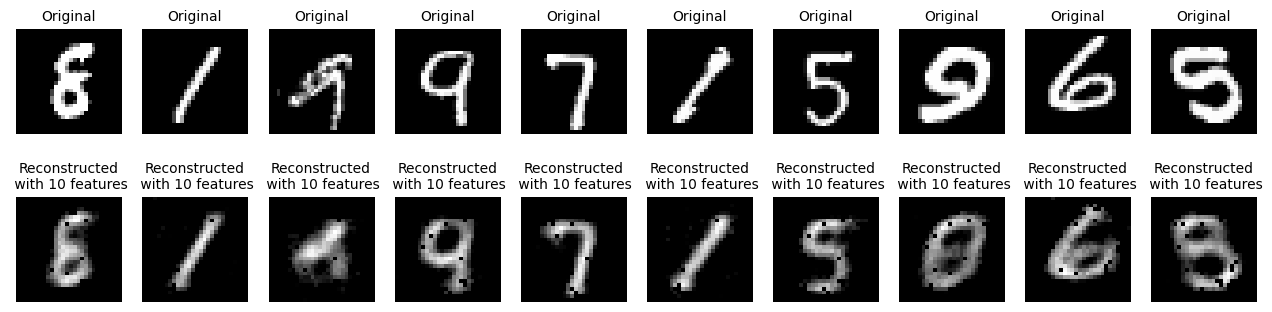

In [18]:
# Select 10 random indices from the test set
random_indices = np.random.randint(0, len(test_images), size=10)

# Get the original and reconstructed images for the selected indices
original_images = test_images[random_indices]
reconstructed_images10 = AE10.predict(original_images)

# Plot pairs of original and reconstructed images
plt.figure(figsize=(16, 4))

for i in range(10):
    # Original image
    plt.subplot(2, 10, i + 1)
    plt.imshow(original_images[i].reshape(28, 28), cmap='gray')
    plt.title('Original', fontsize=10)
    plt.axis('off')

    # Reconstructed image
    plt.subplot(2, 10, i + 1 + 10)
    plt.imshow(reconstructed_images10[i].reshape(28, 28), cmap='gray')
    plt.title('Reconstructed\n with 10 features', fontsize=10)
    plt.axis('off')

plt.show()


## 3. Vary the size of the middle representations.
Write the code for randomly plotting 10 image paris of the orginal and reconstrated images with the size of the middle representation being 5, 2, and 1.

Suggestion: write the model specification and the training as a function with the size of the middle layer as a parameter.

In [19]:
def model_AE(n):

  # This code is given to you
  AE = keras.models.Sequential(name='AE')
  AE.add(keras.layers.Dense(512, activation='relu', input_shape=(28*28,)))
  AE.add(keras.layers.Dense(n, activation='relu'))
  AE.add(keras.layers.Dense(512, activation='relu'))
  AE.add(keras.layers.Dense(784, activation='relu'))
  AE.compile(optimizer = 'rmsprop',
                loss = 'MSE')
  AE.summary()

  return AE


In [20]:
# Use Matplotlib
#import matplotlib.pyplot as plt

# Fit the autoencoder model, middle representation with vector size = 5
AE5 = model_AE(5)
AE5.fit(train_images, train_images, epochs=10, batch_size=128, verbose=1)
test_loss_autoencoder5 = AE5.evaluate(test_images, test_images, verbose=0)
reconstructed_images5 = AE5.predict(original_images)


# Fit the autoencoder model, middle representation with vector size = 2
AE2 = model_AE(2)
AE2.fit(train_images, train_images, epochs=10, batch_size=128, verbose=1)
test_loss_autoencoder2 = AE2.evaluate(test_images, test_images, verbose=0)
reconstructed_images2 = AE2.predict(original_images)

# Fit the autoencoder model, middle representation with vector size = 1
AE1 = model_AE(1)
AE1.fit(train_images, train_images, epochs=10, batch_size=128, verbose=1)
test_loss_autoencoder1 = AE1.evaluate(test_images, test_images, verbose=0)
reconstructed_images1 = AE1.predict(original_images)


Model: "AE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 512)               401920    
                                                                 
 dense_9 (Dense)             (None, 5)                 2565      
                                                                 
 dense_10 (Dense)            (None, 512)               3072      
                                                                 
 dense_11 (Dense)            (None, 784)               402192    
                                                                 
Total params: 809749 (3.09 MB)
Trainable params: 809749 (3.09 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
235/235 [==============================] - 6s 21ms/step - loss: 0.0754
Epoch 2/10
235/235 [==============================] - 6s 24ms/step - loss: 0.0

In [23]:
print(f'Testing loss for the autoencoder, encoding images into a feature of size 10: {test_loss_autoencoder10}')
print(f'Testing loss for the autoencoder, encoding images into a feature of size 5: {test_loss_autoencoder5}')
print(f'Testing loss for the autoencoder, encoding images into a feature of size 2: {test_loss_autoencoder2}')
print(f'Testing loss for the autoencoder, encoding images into a feature of size 1: {test_loss_autoencoder1}')

Testing loss for the autoencoder, encoding images into a feature of size 10: 0.030090032145380974
Testing loss for the autoencoder, encoding images into a feature of size 5: 0.0405413955450058
Testing loss for the autoencoder, encoding images into a feature of size 2: 0.065337635576725
Testing loss for the autoencoder, encoding images into a feature of size 1: 0.0744910016655922


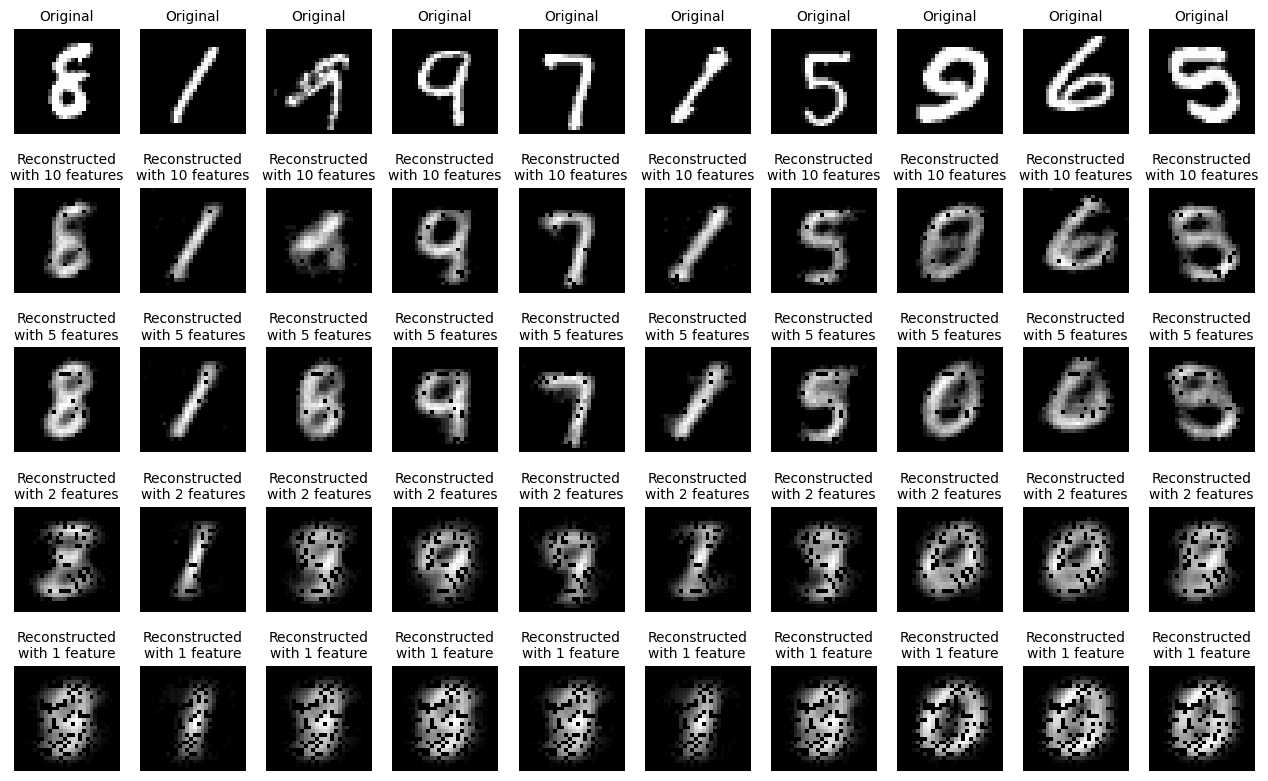

In [25]:
# Plot pairs of original and reconstructed images
plt.figure(figsize=(16, 10))  # Adjust the figsize

for i in range(10):
    # Original images
    plt.subplot(5, 10, i + 1)
    plt.imshow(original_images[i].reshape(28, 28), cmap='gray')
    plt.title('Original', fontsize=10)
    plt.axis('off')

    # Reconstructed images with 10 features
    plt.subplot(5, 10, i + 1 + 10)
    plt.imshow(reconstructed_images10[i].reshape(28, 28), cmap='gray')
    plt.title('Reconstructed\nwith 10 features', fontsize=10)
    plt.axis('off')

    # Reconstructed images with 5 features
    plt.subplot(5, 10, i + 1 + 20)
    plt.imshow(reconstructed_images5[i].reshape(28, 28), cmap='gray')
    plt.title('Reconstructed\nwith 5 features', fontsize=10)
    plt.axis('off')

    # Reconstructed images with 2 features
    plt.subplot(5, 10, i + 1 + 30)
    plt.imshow(reconstructed_images2[i].reshape(28, 28), cmap='gray')
    plt.title('Reconstructed\nwith 2 features', fontsize=10)
    plt.axis('off')

    # Reconstructed images with 1 feature
    plt.subplot(5, 10, i + 1 + 40)
    plt.imshow(reconstructed_images1[i].reshape(28, 28), cmap='gray')
    plt.title('Reconstructed\nwith 1 feature', fontsize=10)
    plt.axis('off')

plt.show()

## 4. What do you observe for varying the size of representations?

The hidden representation size in autoencoders impacts how much information the model captures. A larger size allows for detailed representations but may lead to overfitting and higher computational requirements. On the other hand, a smaller size encourages a more generalized model, reducing computational demands but potentially losing some details in reconstructions.